In [1]:
import pandas as pd

# Import Data Set

In [2]:
df = pd.read_csv("Salary_data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x = df[["YearsExperience"]]
y = df["Salary"]

In [5]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
import matplotlib.pyplot as plt
import random

In [8]:
color = random.sample(range(1, 100), len(x))

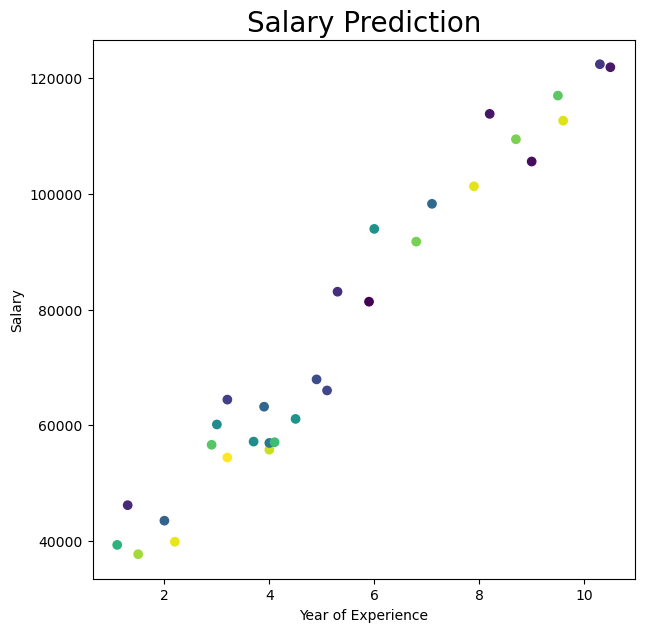

In [9]:
plt.figure(figsize = (7, 7))
plt.scatter(x, y, c = color, cmap = "viridis")
plt.title("Salary Prediction", size = 20)
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()

# Data Train Test 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7, random_state = 3)

In [12]:
len(xtrain)

21

In [13]:
len(xtest)

9

In [14]:
xtrain.head(5)

,YearsExperience
1,1.3
17,5.3
27,9.6
7,3.2
12,4.0


In [15]:
xtest.head()

,YearsExperience
15,4.9
5,2.9
22,7.9
26,9.5
18,5.9


# Linear Regression

In [16]:
from sklearn import linear_model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regr = LinearRegression()

In [19]:
regr.fit(xtrain, ytrain)

LinearRegression()

# Prediction

In [20]:
ypredict = regr.predict(xtest)

In [21]:
xtest

,YearsExperience
15,4.9
5,2.9
22,7.9
26,9.5
18,5.9
14,4.5
13,4.1
2,1.5
16,5.1


In [22]:
ypredict

array([ 73289.5314978 ,  54692.70041028, 101184.77812906, 116062.24299907,
        82587.94704155,  69570.16528029,  65850.79906279,  41674.91864903,
        75149.21460655])

In [23]:
ytest

15     67938.0
5      56642.0
22    101302.0
26    116969.0
18     81363.0
14     61111.0
13     57081.0
2      37731.0
16     66029.0
Name: Salary, dtype: float64

In [24]:
c = [i for i in range(1, len(xtest)+1, 1)]

In [25]:
c

[1, 2, 3, 4, 5, 6, 7, 8, 9]

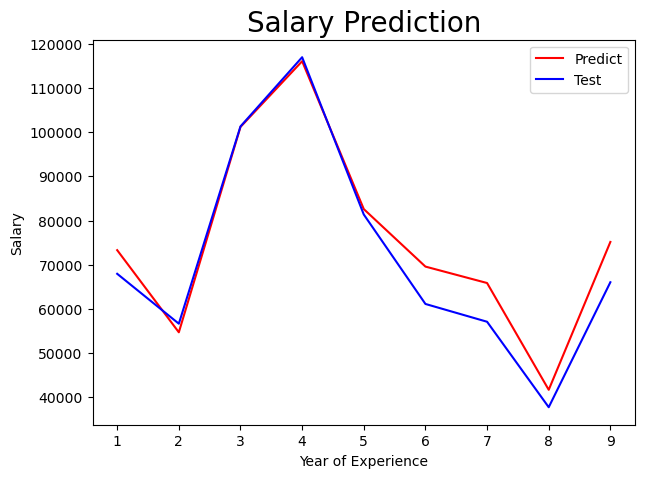

In [26]:
plt.figure(figsize = (7, 5))
plt.plot(c, ypredict, c = "r")
plt.plot(c, ytest, c = "b")
plt.title("Salary Prediction", size = 20)
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.legend(["Predict", "Test"])
plt.show()

# Plotting Error Data

In [27]:
err = ytest - ypredict
print(err)

15   -5351.531498
5     1949.299590
22     117.221871
26     906.757001
18   -1224.947042
14   -8459.165280
13   -8769.799063
2    -3943.918649
16   -9120.214607
Name: Salary, dtype: float64


In [28]:
d = [i for i in range(1, len(ytest)+1, 1)]
d

[1, 2, 3, 4, 5, 6, 7, 8, 9]

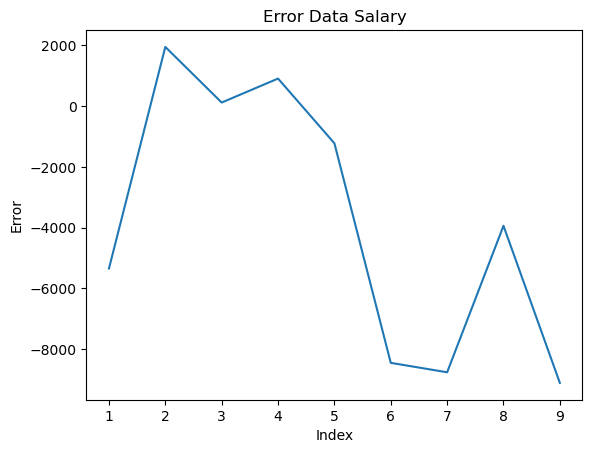

In [29]:
plt.plot(d, err)
plt.title("Error Data Salary")
plt.xlabel("Index")
plt.ylabel("Error")
plt.show()

# Evaluation the Model

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

##### Calculate the mean squared error

In [31]:
mean_se = mean_squared_error(ytest, ypredict)
mean_se

31330529.373708084

##### Calculate the r2_score value

In [32]:
RScore = r2_score(ytest, ypredict)
RScore

0.9409061394841302

# Ploting actual value and predicted value for more insights

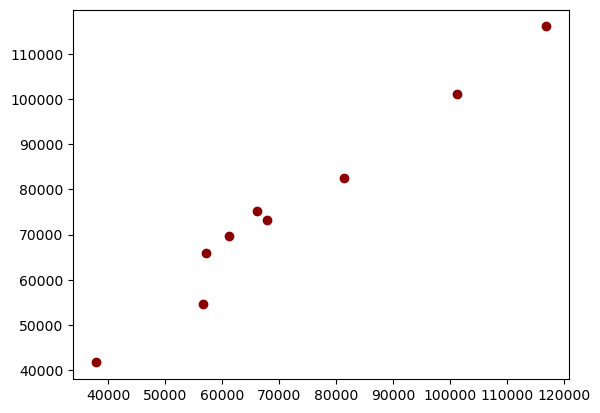

In [33]:
plt.scatter(ytest, ypredict, c="darkred")
plt.show()

In [34]:
print(f"Intercept {regr.intercept_}")
print(f"Coefficient {regr.coef_}")

Intercept 27727.295333394708
Coefficient [9298.41554376]
